<a href="https://colab.research.google.com/github/SeyfGoumeida/Dimensions-Reduction-and-Clustering-on-text-representation/blob/main/Dimensions_Reduction_and_Clustering_on_text_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rpy2

In [2]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

In [4]:
from rpy2.robjects.packages import importr
utils = importr('utils')

In [5]:
#utils.install_packages('FCPS',repos="https://cloud.r-project.org")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘sp’, ‘pracma’, ‘reshape2’, ‘RcppArmadillo’, ‘mclust’, ‘DataVisualizations’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fd86c4ee320> [RTYPES.NILSXP]

In [6]:
#utils.install_packages('fastcluster',repos="https://cloud.r-project.org")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/fastcluster_1.2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 207483 bytes (202 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fd86c4ee320> [RTYPES.NILSXP]

In [35]:
base = importr('base')
fcps = importr('FCPS')
#base.set_seed(42)

In [59]:
import pandas as pd
X = pd.read_csv("/content/dietary_survey_IBS_42.csv",sep=';',decimal=',') 
labels = pd.read_csv("/content/dietary_survey_IBS_True.csv",sep=';',decimal=',')

In [60]:
from sklearn.cluster import KMeans
k=2
pred_labels = KMeans(k , random_state = 42).fit(X).labels_


In [65]:
pred_labels

labels = labels.to_numpy()
labels

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [67]:
fcps.ClusterAccuracy(labels,pred_labels)

array([0.9125])

In [68]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import numpy as np


In [75]:
def _make_cost_m(cm):
  s =np.max(cm)
  return (- cm +s)

def accuracy(true_row_labels, predicted_row_labels):
  cm = confusion_matrix(true_row_labels, predicted_row_labels)
  indexes = linear_sum_assignment ( _make_cost_m(cm))
  total = 0
  for row,column in zip(*indexes):
    value = cm[row][column]
    total += value
  return (total * 1. / np.sum(cm))

In [76]:
accuracy(labels,pred_labels)

0.9125

In [80]:
#X = X.to_numpy()

pam = fcps.PAMclustering(X,k)
pred_labels = pam[0]

In [89]:
print(type(labels))
print(type(pred_labels))
print(type(labels[1]))
print(type(pred_labels[1]))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [86]:
from sklearn.metrics.cluster import normalized_mutual_info_score

normalized_mutual_info_score(labels,pred_labels)

ValueError: ignored

Tendem

In [211]:
import matplotlib.pyplot as plt
#à implimenter
def eval_clustering_2D(x_reduced,pred_labels,labels):
  colors1 = []
  for i in pred_labels:
    if (i == 1):
      colors1.append('red')
    else:
      colors1.append('green')

  colors2 = []
  for i in labels:
    if (i == 1):
      colors2.append('red')
    else:
      colors2.append('green')

  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
  plt.subplot(1, 2, 1)
  plt.scatter(x_reduced[:,0], x_reduced[:,1], c=colors1)
  plt.subplot(1, 2, 2)
  plt.scatter(x_reduced[:,0], x_reduced[:,1], c=colors2)

  #plt.axis([0, 6, 0, 20])
  plt.show()

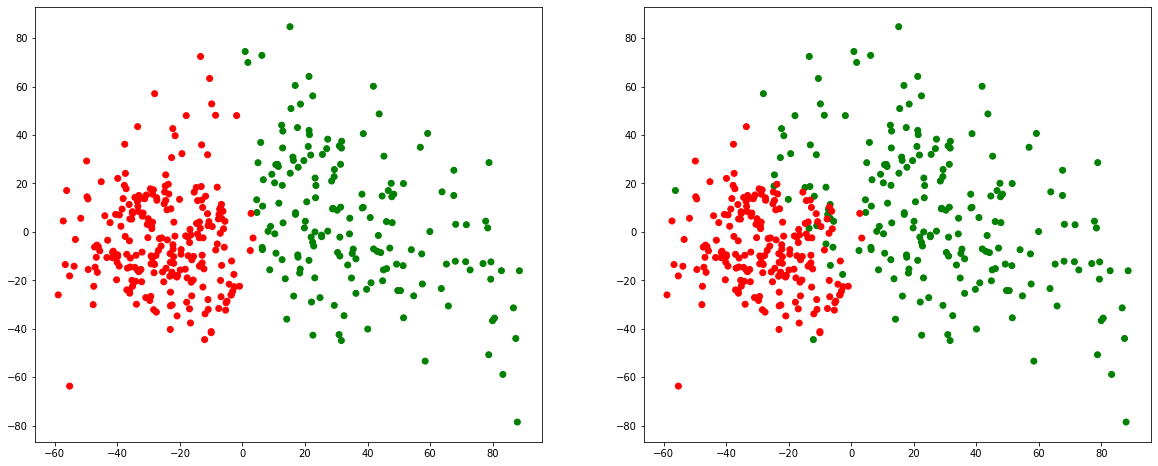

In [212]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n_components = 2

x_reduced = PCA(n_components = n_components , whiten = False,random_state = 42).fit_transform(X)
#x_reduced = PCA(n_components = n_components , whiten = True,random_state = 42).fit_transform(X)

pred_labels = KMeans(k,random_state=42).fit(x_reduced).labels_
eval_clustering_2D(x_reduced,pred_labels,labels)


In [165]:
labels
labelss = []
for i in labels :
  labelss.append(i[0])
labelss


[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
x_reduced = TSNE(n_components = n_components ,random_state = 42).fit_transform(X)
pred_labels = KMeans(k,random_state=42).fit(x_reduced).labels_
eval_clustering_2D(xreduce,pred_labels,labels)


In [107]:
!pip install umap-learn
from umap import UMAP

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 50.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=2b76d2e83e22ca2a30117a5c2df5ffa6c3f63b880e0c20757c2cd3bc28a30c69
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=9eac520a7044f218ad82197d926aa81c0376c48fa4f9178658ea5964ffd930d4
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
x_reduced = UMAP(n_components = n_components ,random_state = 42).fit_transform(X)
pred_labels = KMeans(k,random_state=42).fit(x_reduced).labels_
eval_clustering_2D(xreduce,pred_labels,labels)


In [132]:
from torch.utils.data import DataLoader
import numpy as np
import torch
class AutoEncoder(torch.nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super().__init__()
        self.input_dim = input_dim
        self.embedding_dim = embedding_dim
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(self.input_dim, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, self.embedding_dim)
        )
        
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(self.embedding_dim, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, self.input_dim),
            torch.nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
def autoencoder(X, embedding_dim, n_epochs=50, batch_size=64, learning_rate=1e-3, weight_decay=1e-8, seed=None, return_model=False):
    if torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'
    if seed is not None:
      torch.manual_seed(seed)
    dataloader = DataLoader(dataset=X, batch_size=batch_size, shuffle=True)
    model = AutoEncoder(input_dim=X.shape[1], embedding_dim=embedding_dim)
    if device == 'cuda':
      model.cuda()
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                lr=learning_rate,
                                weight_decay=weight_decay)
    losses = []
    model.train()
    for epoch in tqdm(range(n_epochs)):
        for batch in dataloader:
          batch = batch.to(device)
          reconstructed = model(batch)
          
          loss = loss_function(reconstructed, batch)
          
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          losses.append(loss)
    model.eval()
    encoded_X = model.encoder(torch.tensor(X))
    encoded_X = encoded_X.detach().numpy()
    if return_model:
      return encoded_X, model, losses
    else:
      return encoded_X